In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_val, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
class_names[y_train[0]]

'Coat'

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-15 22:04:19.932034: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-15 22:04:19.932714: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30


2022-07-15 22:04:20.373380: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-15 22:04:20.501635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1714/1719 [============================>.] - ETA: 0s - loss: 0.7214 - accuracy: 0.7679

2022-07-15 22:04:28.773526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 9s 5ms/step - loss: 0.7210 - accuracy: 0.7680 - val_loss: 0.5318 - val_accuracy: 0.8180
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4860 - accuracy: 0.8309 - val_loss: 0.4807 - val_accuracy: 0.8230
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4423 - accuracy: 0.8447 - val_loss: 0.4359 - val_accuracy: 0.8524
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4144 - accuracy: 0.8545 - val_loss: 0.3937 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3928 - accuracy: 0.8618 - val_loss: 0.3914 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3771 - accuracy: 0.8668 - val_loss: 0.3872 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3640 - accuracy: 0.8704 - val_loss: 0.3659 - val_accuracy: 0.8688
Epo

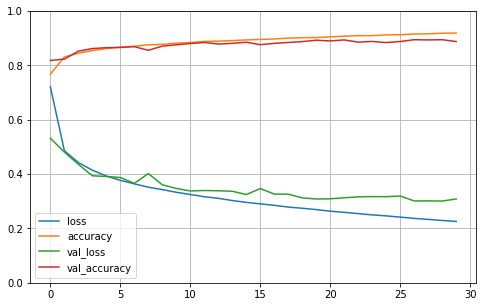

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3492 - accuracy: 0.8727


[0.3491760790348053, 0.872700035572052]

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 174ms/step


2022-07-15 22:16:33.456095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.95],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [16]:
import numpy as np
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])